# __Глубокое обучение 2025__

## Занятие 1. Введение в генеративные модели


## Пример

Покажем, как генерировать новые изображения на основе текстового запроса с помощью реализации модели `Stable Diffusion` от компании __stability.ai__ в библиотеке `KerasCV`.

`Stable Diffusion` — это мощная модель генерации изображений по тексту с открытым исходным кодом. 

Чтобы использовать реализацию `Stable Diffusion` в `KerasCV`, 
импортируем требуемые библиотеки:

In [1]:
# для подавления предупреждающих сообщений используем библиотеку silence_tensorflow
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

In [3]:
import time
import keras_cv
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend


Сперва создадим модель:

In [5]:
model = keras_cv.models.StableDiffusion(
    img_width=512, img_height=512, jit_compile=False
)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


Далее вызовем модель со следующим входным текстом (промптом) на английском языке:

In [11]:
images = model.text_to_image("photograph of a professor driving a sport car", batch_size=3)

50/50 [==============================] - 53s 1s/step


Нарисуем полученные изображения:

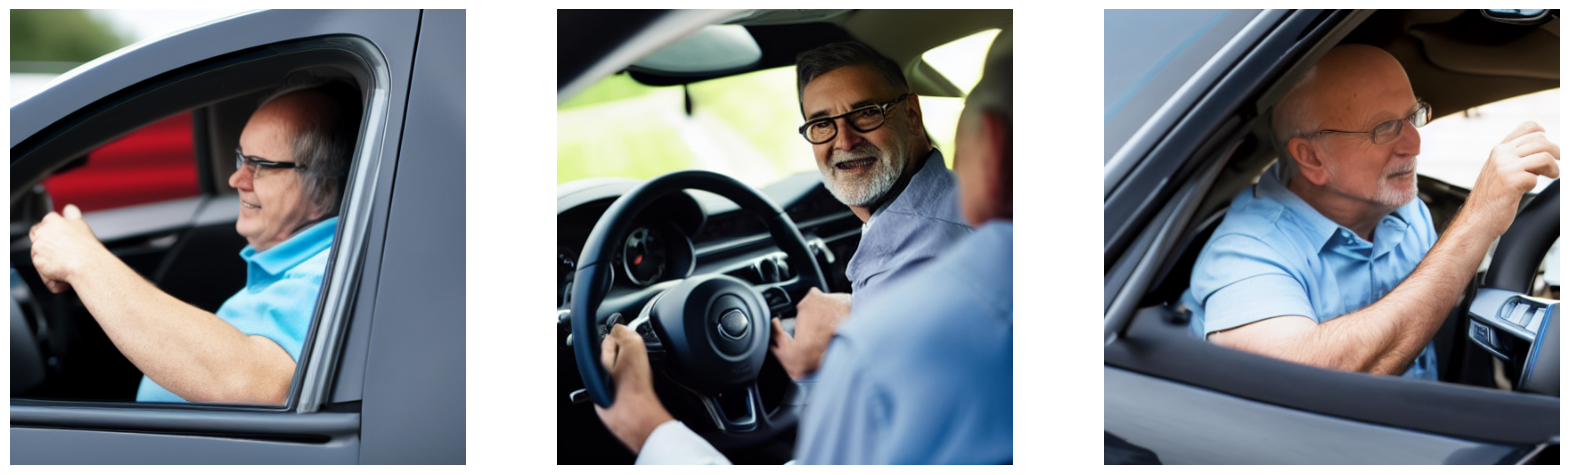

In [13]:
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)

Используем более сложный промпт:

50/50 [==============================] - 53s 1s/step


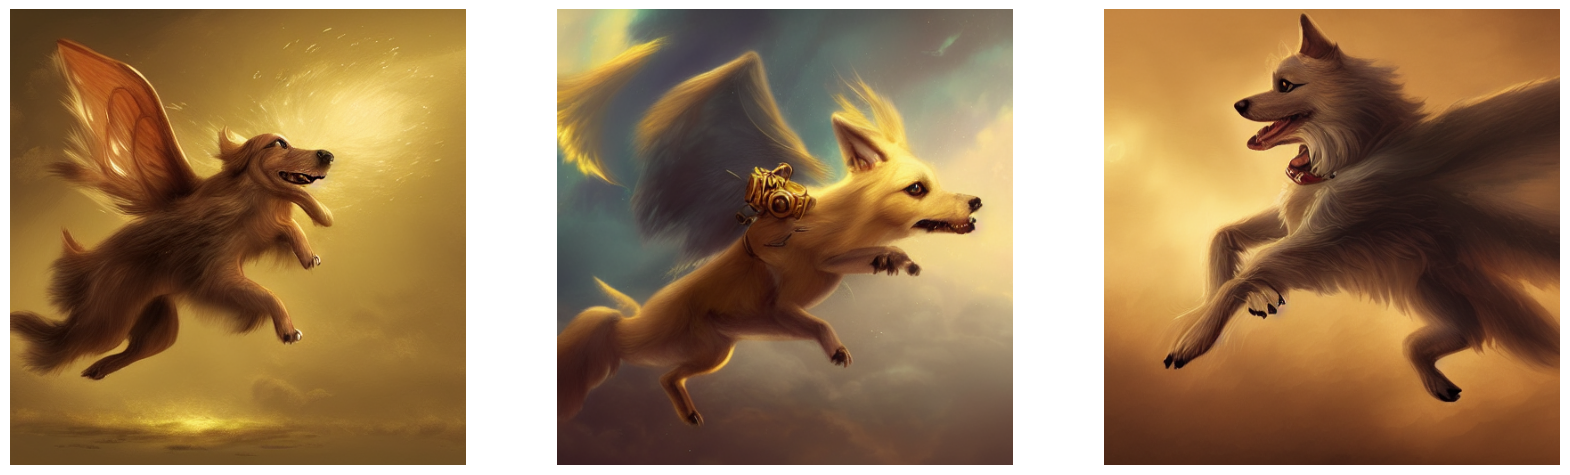

In [15]:
images = model.text_to_image(
    "cute magical flying dog, fantasy art, "
    "golden color, high quality, highly detailed, elegant, sharp focus, "
    "concept art, character concepts, digital painting, mystery, adventure",
    batch_size=3,
)
plot_images(images)

## Генеративные (порождающие) модели

В широком смысле генеративную модель можно определить как вероятностную модель порождения данных. 

Каждый объект в наборе данных состоит из множества признаков, например, для наборов изображений признаками обычно являются значения отдельных пикселей изображений. Наша цель состоит в том, чтобы построить модель, которая может генерировать новые наборы признаков (объекты), которые выглядят так, как будто они были созданы с использованием тех же правил, что и исходные данные. Концептуально для генерации изображений это невероятно сложная задача, учитывая огромное количество способов, которыми могут быть присвоены значения отдельным пикселям, и относительно небольшое количество таких комбинаций пикселей, составляющих изображение объекта, который мы пытаемся смоделировать. 

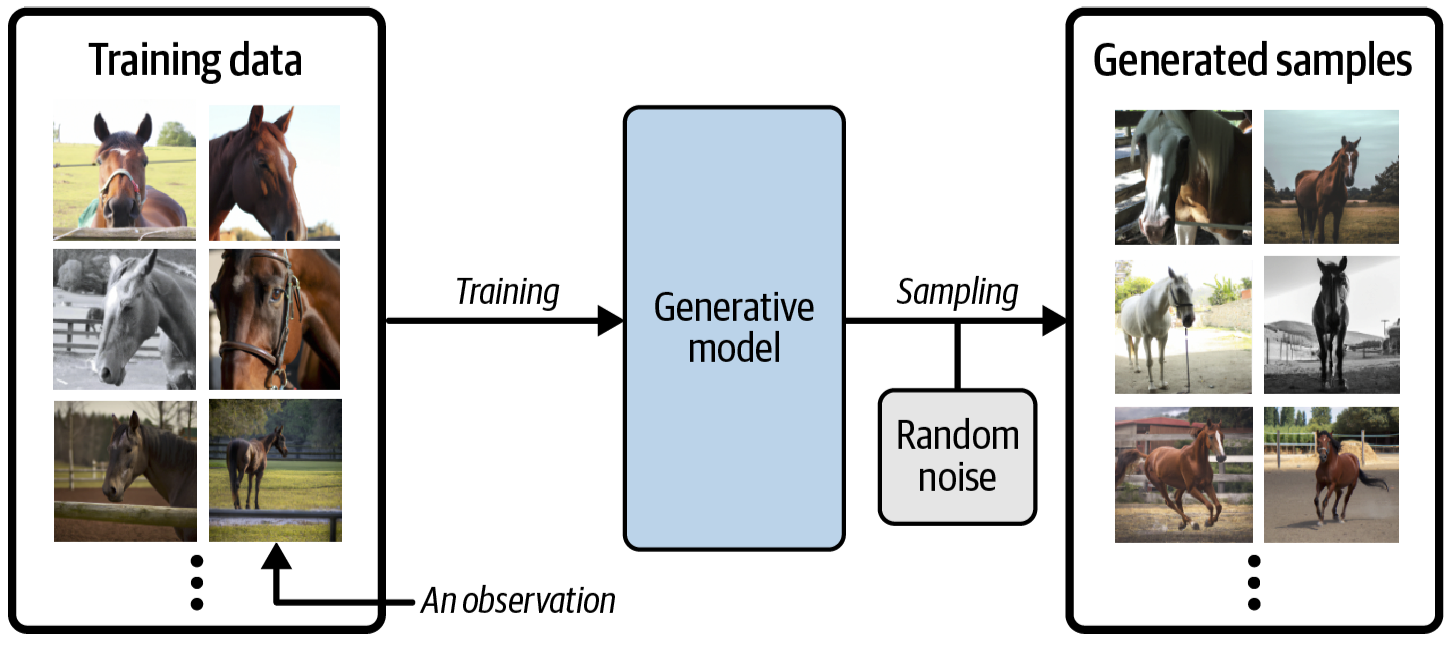

Генеративная модель также должна быть вероятностной, а не детерминированной. Если модель представляет собой просто фиксированный расчет, например получение среднего значения каждого пикселя в наборе данных, то она не является генеративной, поскольку модель каждый раз выдает один и тот же результат. Модель должна включать стохастический (случайный) фактор, влияющий на отдельные объекты, генерируемые моделью. 

Другими словами, можно считать, что существует какое-то неизвестное вероятностное распределение, которое объясняет, почему некоторые изображения, скорее всего, будут найдены в наборе обучающих данных, а другие — нет. Задача состоит в том, чтобы построить модель, максимально точно имитирующую это распределение, а затем построить выборку из нее для создания новых, отдельных объектов, которые выглядят так, как будто они могли быть включены в исходный обучающий набор.

Математически, для неразмеченного набора данных генеративная модель – это модель распределения вероятности $p\left(\mathbf{x}\right)$ для комбинации признаков $\mathbf{x}\in\mathcal{X}$. Для размеченного набора данных с признаками $\mathbf{x}\in\mathcal{X}$ и метками (откликом) $\mathbf{y}\in\mathcal{Y}$ генеративная модель – это модель для построения совместного распределения вероятности $p\left(\mathbf{x},\mathbf{y}\right)$ признаков $\mathbf{x}$ и меток (отклика) $\mathbf{y}$. Если набор данных размечен, то генеративная модель может также оценивать условное распределение $p\left(\mathbf{x}\mid\mathbf{y}\right)$.

Из совместного распределения вероятности $p\left(\mathbf{x},\mathbf{y}\right)$ легко получить условное распределение $p\left(\mathbf{y}\mid\mathbf{x}\right)$ по формуле

$$p\left(\mathbf{y}\mid\mathbf{x}\right)=\frac{p\left(\mathbf{x},\mathbf{y}\right)}{p\left(\mathbf{x}\right)},$$
при этом совместное распределение $p\left(\mathbf{x},\mathbf{y}\right)$ даёт больше информации и его можно использовать для генерации новых экземпляров данных, например, новых изображений животных, которые выглядят как настоящие животные.

Простейшая порождающая модель возникает (неявно) при построении наивного байесовского классификатора.

Дискриминативная модель моделирует только условное распределение $p\left(\mathbf{y}\mid\mathbf{x}\right)$ и может различать разные виды экземпляров данных, например, отличить собаку от кошки. 

Другими словами, дискриминативная модель пытается оценить вероятность того, что объект $\mathbf{x}$ принадлежит категории $\mathbf{y}$. Генеративная модель не занимается маркировкой объектов, вместо этого она пытается оценить вероятность вообще увидеть (получить) объект.

Генеративная модель включает в себя распределение самих данных и сообщает вам, насколько вероятен данный пример. Например, модели, которые предсказывают следующее слово в последовательности, обычно являются генеративными моделями (обычно намного проще, чем GAN), потому что они могут присваивать вероятность последовательности слов.

Дискриминативная модель игнорирует вопрос о том, вероятен ли данный экземпляр данных (признаков и отклика), и просто говорит вам, насколько вероятно, что отклик (метка) соответствует признакам.

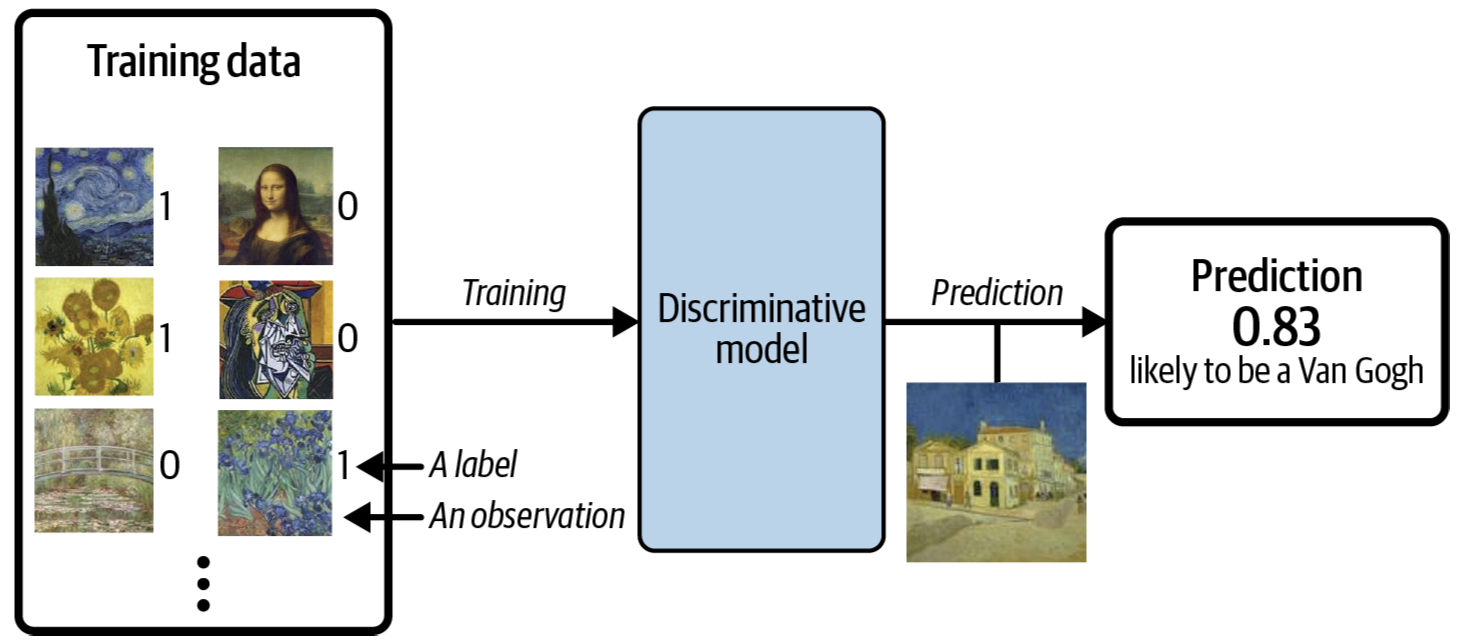

Итак, 

* дискриминативное моделирование оценивает $p\left(y\mid\mathbf{x}\right)$, т.е. выходом дискриминативной модели является вероятность метки $y$ для заданного наблюдения $\mathbf{x}$ 

* генеративное моделирование оценивает $p\left(\mathbf{x}\right)$, т.е. выходом генеративной модели является вероятность заданного наблюдения $\mathbf{x}$ (вероятностное распределение наблюдений). Выборки из этого распределения позволяют нам генерировать новые наблюдения.

* условное генеративное моделирование (conditional generative modeling) оценивает $p\left(\mathbf{x}\mid y\right)$, т.е. выходом генеративной модели является вероятность наблюдения $\mathbf{x}$ с заданной меткой $y$. Например, если датасет содержит изображения различных типов фруктов, то условная генеративная модель порождает изображение заданного типа фрукта. 

### Постановка задачи о построении генеративной модели

* Задан набор данных с наблюдениями $\mathbf{X}$

* Предполагается, что наблюдения в $\mathbf{X}$ были получены в соответствии с некоторым неизвестным распределением $p_{d}$ (или $p_{data}$)

* Требуется построить генеративную модель $p_{m}$ ($p_{model}$), имитирующую распределение $p_{d}$. Если эта цель будет достигнута, то можно будет делать выборку из $p_{m}$, чтобы сгенерировать наблюдения, которые выглядят как наблюдения из $p_{d}$. 

* Желательные свойства модели $p_{d}$ состоят в следующем:

    – __Точность (accuracy)__  
    Если величина $p_{m}$ для сгенерированного наблюдения имеет высокое значение, то наблюдение должно выглядеть так, как будто оно было взято из распределения $p_{d}$. Если величина $p_{m}$ для сгенерированного наблюдения имеет низкое значение, то наблюдение не должно выглядеть так, как будто оно было получено из распределения $p_{d}$.

    – __Генерация__  
    Должна быть возможность легко получить новое наблюдение из $p_{m}$.

    – __Представление__  
    Должна быть возможность интепретации того, как различные высокоуровневые признаки в данных представлены моделью $p_{m}$.

### Терминология генеративных моделей

#### Пространство элементарных событий (Sample space) 

Это полное множество всех значений, которые могут принимать наблюдения $\mathbf{x}$.

#### Функция плотности вероятности (Probability density function)

Функция плотности вероятности или просто функция плотности – это функция $p\left(\mathbf{x}\right)$, которая отображает точку $\mathbf{x}$ в пространстве элементарных событий в неотрицательное число. Интеграл от функции плотности по всем точкам пространства элементарных событий должен быть равен 1.

Хотя существует только одна истинная функция плотности $p_{d}\left(\mathbf{x}\right)$, которая сгенерировала наблюдаемый датасет, существует бесконечно много функций плотности $p_{m}\left(\mathbf{x}\right)$, которые могут быть использованы для оценки $p_{d}\left(\mathbf{x}\right)$.

#### Параметрическое моделирование (Parametric modeling)

Параметрическое моделирование – это техника структурирования поиска подходящей функции плотности $p_{m}\left(\mathbf{x}\right)$. Параметрическая модель – это семейство функций плотности $p_{m}\left(\mathbf{x};\theta\right)$, которое может быть описано конечным числом параметров $\theta$.

#### Правдоподобие (Likelihood)

Правдоподобие $\mathscr{L}\left(\theta;\mathbf{x}\right)$ набора параметров $\theta$  – это функция, которая измеряет достоверность набора $\theta$  для заданной наблюдаемой точки данных $\mathbf{x}$. Правдоподобие определяется как

$$\mathscr{L}\left(\theta\mid\mathbf{x}\right)=p_{m}\left(\mathbf{x};\theta\right)$$

Таким образом, правдоподобие $\theta$  для заданной наблюдаемой точки $\mathbf{x}$ определяется как значение функции плотности, параметризованной $\theta$, в точке $\mathbf{x}$. Если имеется целый набор данных $\mathbf{X}$ из независимых наблюдений, то можно записать

$$\mathscr{L}\left(\theta\mid\mathbf{X}\right)=\prod_{\mathbf{x}\in\mathbf{X}}p_{m}\left(\mathbf{x};\theta\right)$$

Так как произведение большого числа множителей между 0 и 1 может быть неудобным объектом при проведении вычислений, часто вместо правдоподобия используют логарифмическое правдоподобие (log-likelihood)

$$l\left(\theta\mid\mathbf{X}\right)=\sum_{\mathbf{x}\in\mathbf{X}}\log p_{m}\left(\mathbf{x};\theta\right)$$

Существуют статистические причины, почему правдоподобие определяется таким образом, но также можно увидеть, что это определение имеет интуитивный смысл. Правдоподобие набора параметров $\theta$  по определению является вероятностью наблюдения данных, если истинное распределение, генерирующее данные, является распределением модели, параметризованной $\theta$.

Заметим, что правдоподобие – это функция параметров, а не данных. Правдоподобие не может быть интепретировано как вероятность, что заданный набор параметров правильный. Другими словами, правдоподобие не является вероятностным распределением над пространством параметров (например, интеграл или сумма правдоподобий не равна 1).

Интуитивно фокус параметрического моделирования состоит в том, чтобы найти оптимальное значение $\hat{\theta}$ набора параметров, которое максимизирует правдоподобие наьлюдения набора данных $\mathbf{X}$. 

#### Оценка максимального правдоподобия (Maximum likelihood estimation)

Оценка максимального правдоподобия – это техника, которая позволяет нам оценить $\hat{\theta}$ – набор параметров $\theta$  функции плотности $p_{m}\left(\mathbf{x};\theta\right)$, который наиболее достоверно объясняет наблюдаемые данные $\mathbf{X}$. Формально:

$$\hat{\theta}=\underset{\theta}{\arg\max}\,l\left(\theta\mid\mathbf{X}\right)$$

Величина $\hat{\theta}$ также называется оценкой максимального правдоподобия (maximum likelihood estimate, MLE).

Нейронные сети обычно минимизируют функцию потерь, поэтому также можно эквивалентно говорить об определении набора параметров, который минимизирует отрицательное логарифмическое правдоподобие (negative log-likelihood):

$$\hat{\theta}=\underset{\theta}{\arg\min}\left(-l\left(\theta\mid\mathbf{X}\right)\right)=\underset{\theta}{\arg\min}\left(-\log p_{m}\left(\mathbf{X};\theta\right)\right)$$

Глубокое генеративное моделирование может рассматриваться как форма оценки максимального правдоподобия, где параметры $\theta$  являются весами нейронной сети модели.

## Развитие генеративных моделей

Генеративные модели за последнее десятилетие получили существенное развитие.

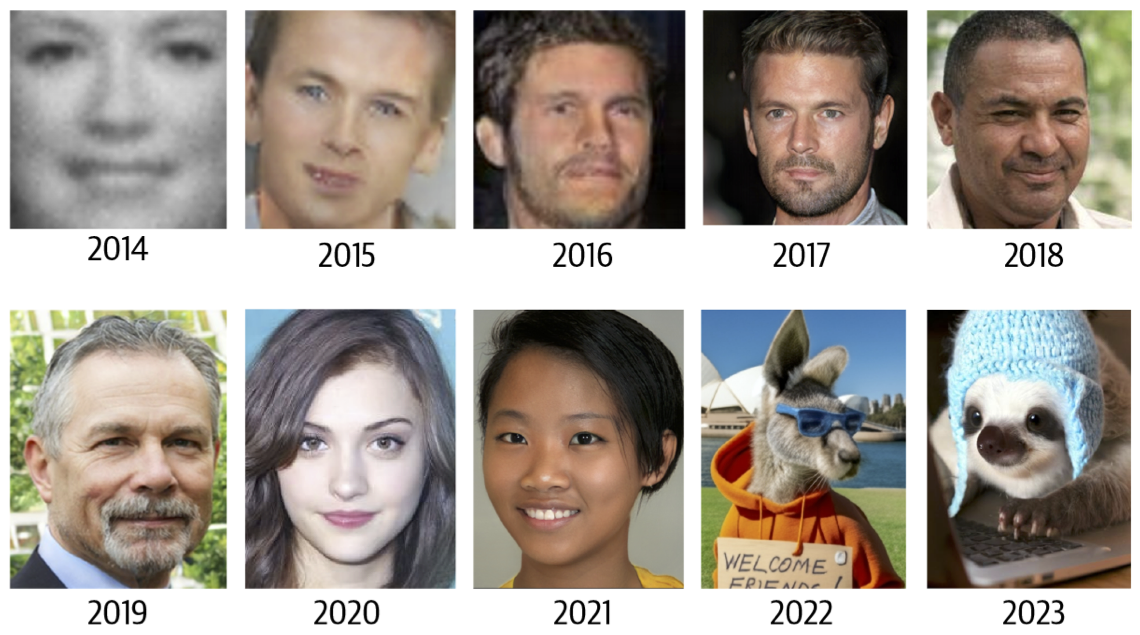

Генеративные модели различаются как раз тем, как именно они строят распределение $p_{m}\left(\mathbf{x};\theta\right)$.

На высоком уровне мы можем различать глубокие генеративные модели (DGM), которые используют глубокую нейронную сеть для изучения сложного отображения из одного скрытого вектора $z$ в наблюдаемые данные $x$, и более «классические» вероятностные графические модели (PGM). которые отображают набор взаимосвязанных скрытых переменных $z_{1},...,z_{L}$ к наблюдаемым переменным $x_{1},...,x_{D}$ с использованием более простых, часто линейных отображений. 

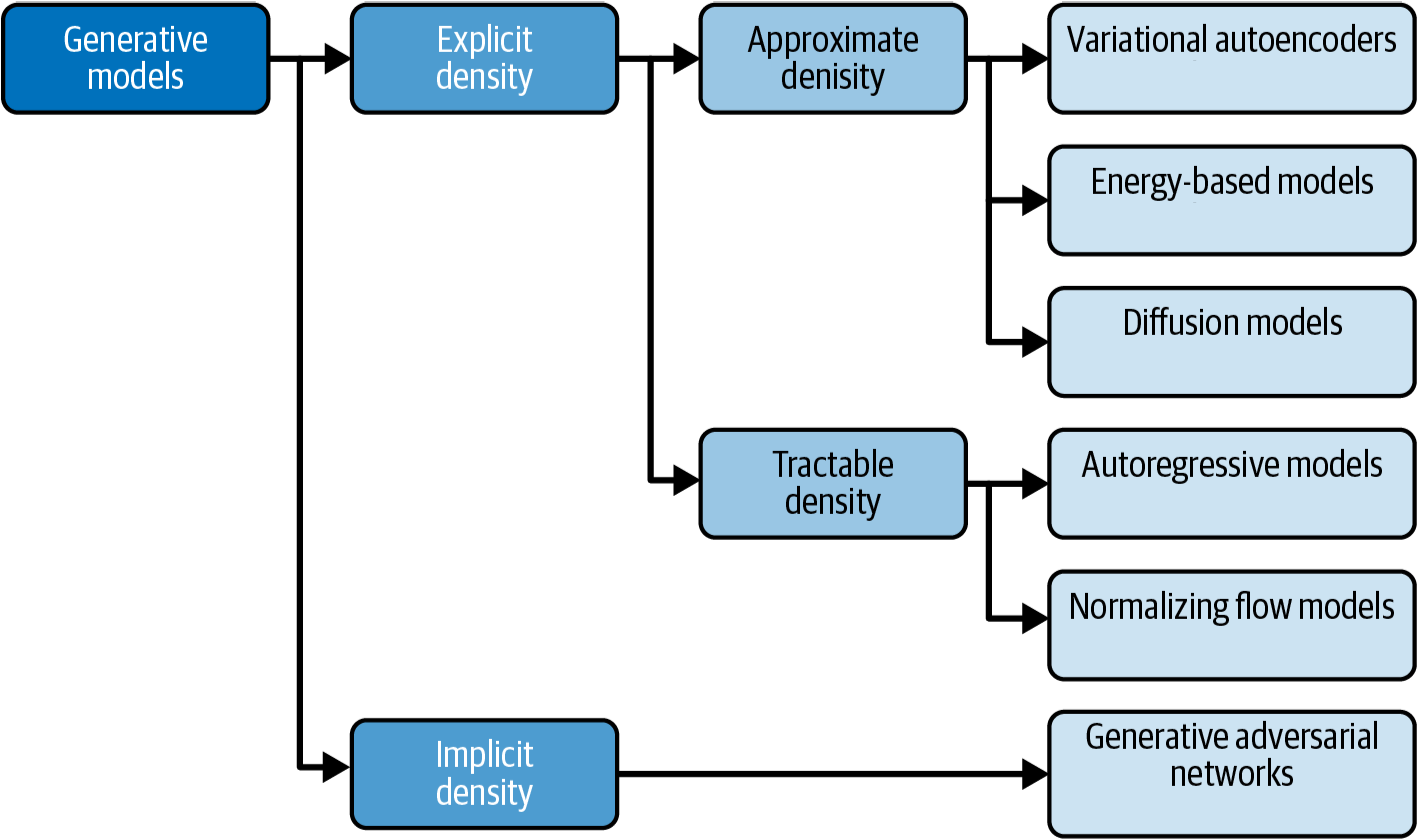

Основными видами глубоких генеративных моделей DGM являются: 

* вариационные автоэнкодеры (VAE), 
* авторегрессионные (AR) модели, 
* нормализующие потоки, 
* диффузионные модели, 
* энергетические модели (EBM) и 
* генеративно-состязательные сети (GAN).

Мы можем классифицировать эти модели с точки зрения следующих критериев:

* __Плотность__: поддерживает ли модель точечную оценку функции плотности вероятности $p(x)$, и если да, то является ли она быстрой или медленной, точной, приближенной или границей и т. д.? Для неявных моделей, таких как GAN, нет четко определенной плотности $p(x)$. Для других моделей мы можем вычислить только нижнюю границу плотности (VAE) или приближение к плотности (EBM).

* __Сэмплирование__: поддерживает ли модель создание новых выборок, $x\sim p(x)$, и если да, то является ли сэмплирование быстрым или медленным, точным или приближенным? Направленные PGM, VAE и GAN поддерживают быстрое сэмплирование. Однако модели EBM, AR, диффузии и потоков являются медленными для построения выборок.

* __Обучение__: какой метод используется для оценки параметров? Для некоторых моделей (таких как AR, потоки) мы можем выполнить точную оценку максимального правдоподобия (MLE), хотя целевая функция обычно невыпукла, поэтому мы можем достичь только локального экстремума. Для других моделей мы не можем точно вычислить правдоподобие. В случае VAE мы максимизируем нижнюю границу правдоподобия; в случае EBM мы максимизируем аппроксимацию правдоподобия. Для GAN мы должны использовать минимально-максимальное обучение, которое может быть нестабильным, и нет четкой целевой функции для мониторинга.

* __Скрытые (латентные) переменные__: использует ли модель скрытый вектор $z$ для генерации $x$ или нет, и если да, то имеет ли он тот же размер, что и $x$, или это потенциально сжимающее представление? Например, модели AR не используют латентные переменные, а потоки и диффузия используют латентные данные, но они не сжаты. Модели EBM могут использовать или не использовать латентные переменные.

* __Архитектура__: какую нейронную сеть использовать и есть ли ограничения? Для потоков мы ограничены использованием обратимых нейронных сетей, где каждый слой имеет управляемый якобиан. Для EBM мы можем использовать любую модель, которая нам нравится. Другие модели имеют другие ограничения.

### Цели генеративного моделирования

Одной из основных целей генеративных моделей является генерация (создание) новых выборок данных. Например, если мы подгоняем модель $p(x)$ к изображениям лиц, мы можем выбирать из нее новые лица. Подобные методы можно использовать для создания образцов текста, аудио и т. д. Генеративные модели также можно использовать для создания синтетических данных для обучения дискриминативных моделей.

Чтобы описать то, что генерируется, полезно использовать условную генеративную модель вида $p\left(x\mid c\right)$. Вот некоторые примеры:

* $c$ = __текст__, $x$ = __изображение__. Это модель преобразования текста в изображение 

* $c$ = __изображение__, $x$ = __текст__. Это модель преобразования изображения в текст, которая полезна для генерации подписей к изображениям. 

* $с$ = __изображение__, $х$ = __изображение__. Это модель преобразования изображения в изображение, которую можно использовать для раскрашивания изображений, закрашивания, снятие обрезки, восстановление артефактов JPEG и т.д. 

* $c$ = __последовательность звуков__, $x$ = __последовательность слов__. Это модель преобразования речи в текст, которая полезна для автоматического распознавания речи (ASR)

* $c$ = __последовательность, скажем, английских слов__, $x$ = __последовательность слов другого языка__. Это модель преобразования последовательности к последовательность, которая полезна для машинного перевода.

* $c$ = __начало текста__, $x$ = __продолжение текста__. Это еще одна модель преобразования последовательности в последовательность, которая полезна для автоматической генерации текста.

Обратите внимание, что для условной генеративной модели мы иногда обозначаем входы через $x$ и выходы через $y$. В этом случае модель имеет привычный вид $p(y\mid x)$. В частном случае, когда $y$ обозначает величину низкой размерности, такую как метка целочисленного класса, $y\in\left\{ 1,...,C\right\}$, мы получаем предиктивную (дискриминативную) модель. Основное различие между дискриминативной моделью и условной генеративной моделью заключается в следующем: в дискриминативной модели мы предполагаем, что есть один правильный выход, тогда как в условной генеративной модели мы предполагаем, что правильных выходов может быть несколько. Это затрудняет оценку генеративных моделей.

### Задание 1 по теме №1

Запустить модель Stable Diffusion (в Jupyter Notebook от Anaconda или в Colab), придумать свой вариант промпта, связанный с вашим знаком зодиака, сгенерировать изображения, соответствующие промпту, прислать результат через ТУИС.